# Understanding Neural Networks

A `Neural Network` is a computational model inspired by human brain's network of neurons.
It consists of interconnected nodes (artifical neurons) organized in layers that process

## Key Components
* Input Layer : Receives the input data
* Hidden Layer: Perform computations and transformations
* Output Layer: Produces the final Prediction
* Weights: Parameters that determine connection strength
* Biases: Additional Parameters that help fit the data better
* Activation Functions: Introduce non-linearity to the model

## The Perceptron: Building Block of Neural Networks
The perceptron is the simplest type of neural network - a single layer that makes decisions based on linear combination of inputs

**Perceptron Components**
1. Input Feature
2. Weights
3. Summation Function
4. Activation Function
5. Output
6. Bias
7. Learning Algorithm

This components makes the perceptron to learn from data and make predictions.

In [7]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Perceptron

In [6]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters= n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        #Ensure labels are -1 or 1
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.where(linear_output >= 0, 1, -1)

                #Perceptron
                update = self.lr * (y_[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

### Activation Functions

Activation Functions introduce non-linearity into the network, allowing it to learn complex patterns. 
Common activation functions:
1. Sigmoid: S-shaped curve between 0 and 1
2. Relu - Return 0 for negative inputs, linear for positive
3. Tanh - S-shaped curved between -1 and 1
4. Softmax - Used for multi-class classification

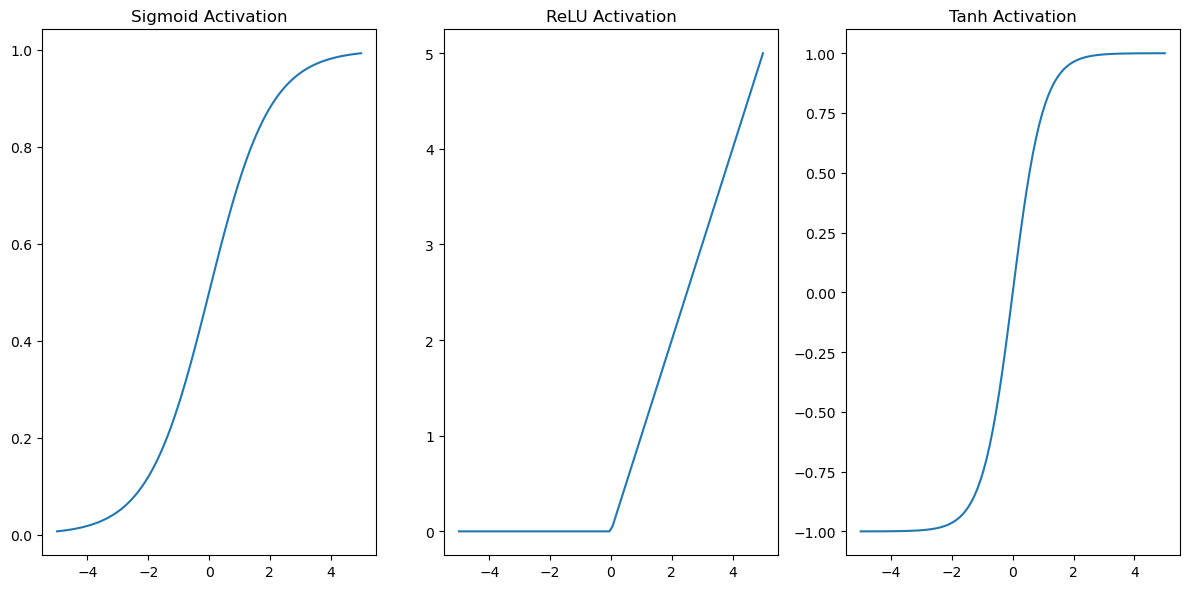

In [8]:
# Visualization
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(12,6))

#Sigmoid
plt.subplot(1,3,1)
plt.plot(x, 1/(1 + np.exp(-x)))
plt.title('Sigmoid Activation')

#ReLU
plt.subplot(1,3,2)
plt.plot(x, np.maximum(0, x))
plt.title('ReLU Activation')

#Tanh
plt.subplot(1,3,3)
plt.plot(x, np.tanh(x))
plt.title('Tanh Activation')

plt.tight_layout()
plt.show()

# Building a Neural Network

## Dataset
Using the Wisconsin Breast Cancer dataset to build a neural network for binary classification

## WorkFlow
1. Import Libraries
2. Load Dataset
3. Exploratory Data Analysis
4. Split the data into train and test set
5. Building the Neural Network Model
6. Evaluate the model
7. Dimensionality Reduction
8. Train the new model on the reduced data
9. Prediction
10. Visualization
11. Insights and Conclusion

In [45]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# Load DataSets
data = load_breast_cancer()
X = data.data
y = data.target

In [12]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the Neural Network Model

In [14]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=0)

## Evaluating the model


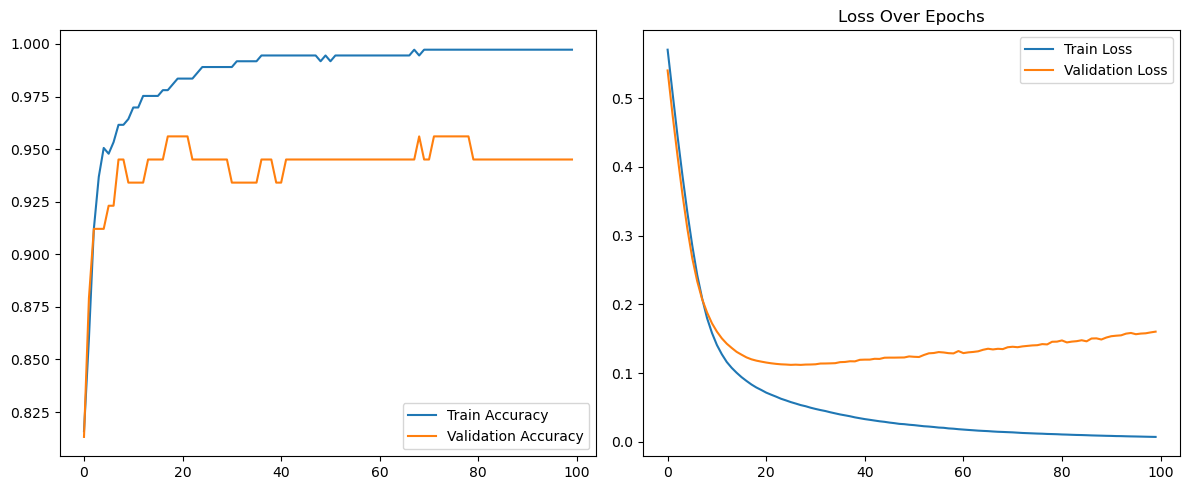

In [57]:
#Plot the training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.savefig('LossOverEpochs.png')
plt.show()

In [23]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc*100:.2f}%')

Test Accuracy: 94.74%


# 3D Visualization of Neural Network

In [26]:
#Reducing the dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

In [46]:
# Train the new model on the reduced data for visualization
model_pca = Sequential([
    Dense(8, activation='relu', input_shape=(3,), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_pca.compile(optimizer=Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                 )

#Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model_pca.fit(X_pca, y_train, epochs=50, verbose=0, callbacks=[early_stop])

In [47]:
#Create a meshgrid for 3D Visualization
x_range = tf.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1,20)
y_range = tf.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1,20)
z_range = tf.linspace(X_pca[:, 2].min() - 1, X_pca[:, 2].max() + 1,20)

xx, yy, zz = tf.meshgrid(x_range, y_range, z_range, indexing='ij')

In [48]:
# predict on meshgrid points
mesh_points = tf.stack([tf.reshape(xx, [-1]),
                        tf.reshape(yy, [-1]),
                        tf.reshape(zz, [-1])], axis=1)
Z = model_pca.predict(mesh_points)
Z = tf.reshape(Z, xx.shape)

250/250 [==============================] - 0s 463us/step


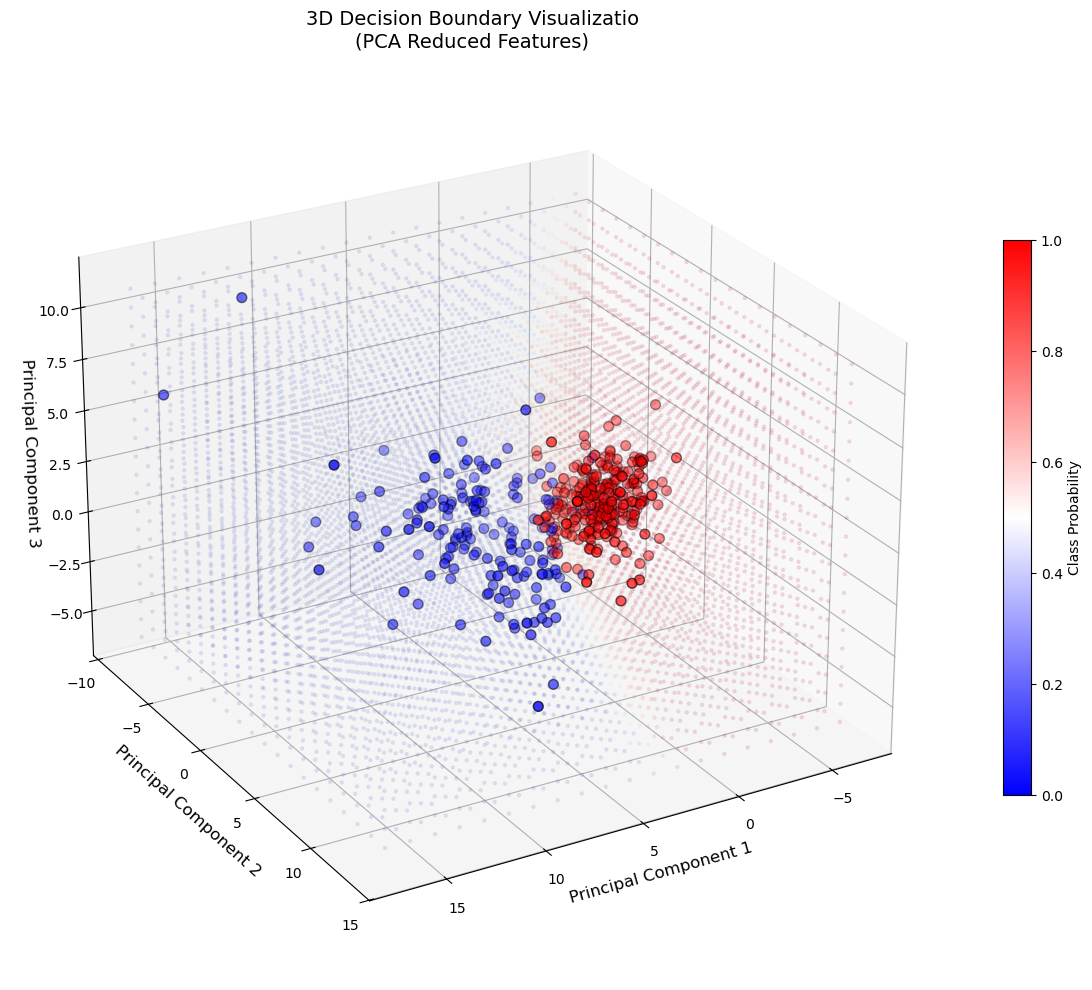

In [55]:
# Create the 3D plot
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

#Plot decision surface
ax.scatter(xx.numpy().flatten(),
           yy.numpy().flatten(),
           zz.numpy().flatten(),
           c=Z.numpy().flatten(),
           cmap='coolwarm',
           alpha=0.1,
           marker='.')

#Plot actual datapoints
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                     c=y_train,
                     cmap='bwr',
                     edgecolor='k',
                     s=50,
                     depthshade=True,
                     label='Actual Data')

#Add colorbar for the decision surfaces
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Class Probability')

#Labels and titles
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D Decision Boundary Visualizatio\n(PCA Reduced Features)', fontsize=14)

#Add grid and adjust view
ax.grid(True)
ax.view_init(elev=25, azim=60)

plt.tight_layout()
plt.savefig('3D Decision Boundary.png')
plt.show()

## Conclusions:
Neural networks are powerful models that can learn complex patterns through hierarchical feature learning.

The choice of activation functions significantly impacts network performance:

ReLU works well in hidden layers

Sigmoid is appropriate for binary classification output

Proper data preprocessing (scaling) is crucial for neural network performance.

Visualization techniques like PCA and 3D plotting help understand how neural networks make decisions, even if we need to reduce dimensions for visualization.

Monitoring training curves helps identify issues like overfitting or underfitting.

The breast cancer classification example demonstrates that even relatively simple neural networks can achieve excellent performance on real-world medical datasets.

## Author

**Francis Carl Sumile**
* Deep Learning and Machine Learning Enthusiast | Data Science
* github/francisuml